In [1]:
!pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0 --quiet

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

if os.path.exists("/kaggle/input/creditcardfraud/creditcard.csv"):
    data_path = "/kaggle/input/creditcardfraud/creditcard.csv"
    print("Running on Kaggle environment")
else:
    data_path = "./data/creditcard.csv"
    print("Running locally")

print(f"Loading data from: {data_path}\n")
df = pd.read_csv(data_path)

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

print("\nBasic Statistics:")
display(df.describe())

# Check for missing values
print("Missing Values:")
display(df.isnull().sum())

print("\nDataset Info:")
display(df.info())

Running on Kaggle environment
Loading data from: /kaggle/input/creditcardfraud/creditcard.csv

Dataset Shape: (284807, 31)

First few rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Basic Statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Missing Values:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


None

In [3]:
df.tail() # Last 5 columns of dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df.duplicated().any() # Check for duplicate values
df.drop_duplicates(inplace = True) # Remove duplicate values
df['Class'].value_counts() # Count of each class
df.shape # Shape after removing duplicates

(283726, 31)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [7]:
df.drop(['Time'],axis =1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


In [8]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

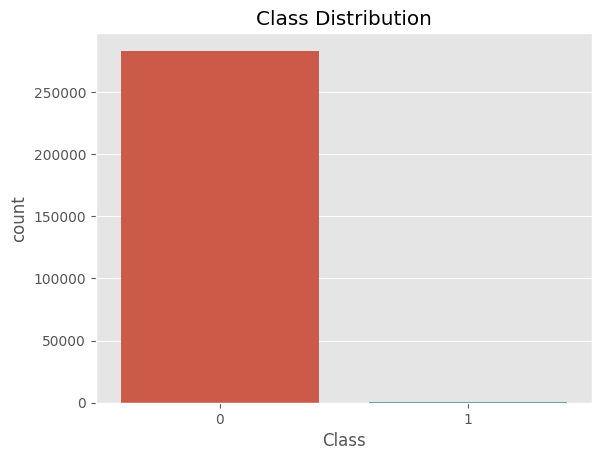

In [9]:
plt.style.use('ggplot')
sns.countplot(x = 'Class', data = df) # Count plot for class distribution
plt.title('Class Distribution') # Title for the plot
plt.show()  # Show the plot
X = df.drop('Class', axis=1) # Features
y = df['Class'] # Target variable

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y) # Split data
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Initialize scaler
X_train = scaler.fit_transform(X_train) # Scale training data
X_test = scaler.transform(X_test) # Scale test data
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42) # Initialize model
model.fit(X_train, y_train) # Train model
y_pred = model.predict(X_test) # Make predictions

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
classifier = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42)
}

In [12]:
for name, clf in classifier.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Model: {name}")
    print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"\n Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"\n Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("-" * 5)
print(confusion_matrix(y_test, y_pred)) # Confusion matrix
print(classification_report(y_test, y_pred)) # Classification report


 Model: Random Forest

 Accuracy: 0.9996

 Precision: 0.9569

 Recall: 0.7817

 F1 Score: 0.8605
-----

 Model: Logistic Regression

 Accuracy: 0.9991

 Precision: 0.8438

 Recall: 0.5704

 F1 Score: 0.6807
-----

 Model: Decision Tree Classifier

 Accuracy: 0.9992

 Precision: 0.7710

 Recall: 0.7113

 F1 Score: 0.7399
-----
[[84946    30]
 [   41   101]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.77      0.71      0.74       142

    accuracy                           1.00     85118
   macro avg       0.89      0.86      0.87     85118
weighted avg       1.00      1.00      1.00     85118



In [13]:
normal = df[df['Class'] == 0] # Normal transactions
fraud = df[df['Class'] == 1] # Fraudulent transactions
normal.shape # Shape of normal transactions
fraud.shape # Shape of fraudulent transactions
print(f'Normal transactions: {len(normal)}') # Count normal transactions

Normal transactions: 283253


In [14]:
normal_sample = normal.sample(n=473) # Sample normal transactions
normal_sample.shape
new_data = pd.concat([normal_sample, fraud], ignore_index=True) # New balanced dataset
new_data.head()
new_data['Class'].value_counts() # Count of each class in new dataset
X = new_data.drop('Class', axis=1) # Features
y = new_data['Class'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y) # Split new data
scaler = StandardScaler() # Initialize scaler

In [15]:
classifier = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42)
}

In [16]:
for name, clf in classifier.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Model: {name}")
    print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"\n Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"\n Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("-" * 10)


 Model: Random Forest

 Accuracy: 0.9261

 Precision: 0.9416

 Recall: 0.9085

 F1 Score: 0.9247
----------

 Model: Logistic Regression

 Accuracy: 0.9437

 Precision: 0.9565

 Recall: 0.9296

 F1 Score: 0.9429
----------

 Model: Decision Tree Classifier

 Accuracy: 0.9049

 Precision: 0.9078

 Recall: 0.9014

 F1 Score: 0.9046
----------


In [17]:
# 1. Split the ORIGINAL, imbalanced data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Apply SMOTE ONLY to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Now check the counts - Training is balanced, Test remains realistic (imbalanced)
print("Training Class Counts:\n", y_train_res.value_counts())
print("Test Class Counts (Reality Check):\n", y_test.value_counts())

Training Class Counts:
 Class
1    331
0    331
Name: count, dtype: int64
Test Class Counts (Reality Check):
 Class
1    142
0    142
Name: count, dtype: int64


In [18]:
classifier = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42)
}

In [19]:
for name, clf in classifier.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Model: {name}")
    print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"\n Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"\n Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("-" * 10)


 Model: Random Forest

 Accuracy: 0.9261

 Precision: 0.9416

 Recall: 0.9085

 F1 Score: 0.9247
----------

 Model: Logistic Regression

 Accuracy: 0.9366

 Precision: 0.9559

 Recall: 0.9155

 F1 Score: 0.9353
----------

 Model: Decision Tree Classifier

 Accuracy: 0.9049

 Precision: 0.9078

 Recall: 0.9014

 F1 Score: 0.9046
----------


In [20]:
dtc = DecisionTreeClassifier(random_state=42) # Initialize Decision Tree Classifier
dtc.fit(X_train, y_train) # Train model
y_pred = dtc.predict(X_test) # Make predictions
print(confusion_matrix(y_test, y_pred)) # Confusion matrix
print(classification_report(y_test, y_pred)) # Classification report

[[129  13]
 [ 14 128]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       142
           1       0.91      0.90      0.90       142

    accuracy                           0.90       284
   macro avg       0.90      0.90      0.90       284
weighted avg       0.90      0.90      0.90       284



In [31]:
# 1. Select the row
if hasattr(X_test, "iloc"):
    single_row = X_test.iloc[[0]]
else:
    # If X_test is an array, we turn it back into a DataFrame with names
    single_row = pd.DataFrame(X_test[0].reshape(1, -1), columns=scaler.feature_names_in_)

# 2. Transform and Predict
# By ensuring single_row is a DataFrame with names, the warning vanishes
scaled_row = scaler.transform(single_row)
prediction = model.predict(scaled_row)

# 3. Output
result = "🚨 FRAUDULENT" if prediction[0] == 1 else "✅ LEGITIMATE"
print(f"Prediction for Transaction 0: {result}")

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(scaler.transform(X_test))
print(classification_report(y_test, y_pred))

Prediction for Transaction 0: ✅ LEGITIMATE
              precision    recall  f1-score   support

           0       0.59      0.98      0.74       142
           1       0.94      0.32      0.47       142

    accuracy                           0.65       284
   macro avg       0.76      0.65      0.60       284
weighted avg       0.76      0.65      0.60       284



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
preds = model.predict(scaler.transform(X_test))
for i, p in enumerate(preds):
    print(f"Row {i}: {'The transaction is Legitimate' if p == 0 else 'The transaction is Fraudulent'}")

Row 0: The transaction is Legitimate
Row 1: The transaction is Fraudulent
Row 2: The transaction is Legitimate
Row 3: The transaction is Legitimate
Row 4: The transaction is Legitimate
Row 5: The transaction is Fraudulent
Row 6: The transaction is Legitimate
Row 7: The transaction is Fraudulent
Row 8: The transaction is Legitimate
Row 9: The transaction is Legitimate
Row 10: The transaction is Legitimate
Row 11: The transaction is Fraudulent
Row 12: The transaction is Legitimate
Row 13: The transaction is Legitimate
Row 14: The transaction is Legitimate
Row 15: The transaction is Legitimate
Row 16: The transaction is Legitimate
Row 17: The transaction is Fraudulent
Row 18: The transaction is Legitimate
Row 19: The transaction is Legitimate
Row 20: The transaction is Legitimate
Row 21: The transaction is Legitimate
Row 22: The transaction is Legitimate
Row 23: The transaction is Legitimate
Row 24: The transaction is Legitimate
Row 25: The transaction is Fraudulent
Row 26: The transactio

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


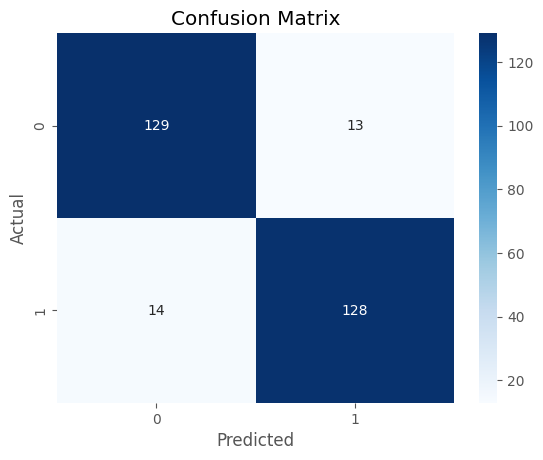

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       142
           1       0.91      0.90      0.90       142

    accuracy                           0.90       284
   macro avg       0.90      0.90      0.90       284
weighted avg       0.90      0.90      0.90       284

Feature Importances: 


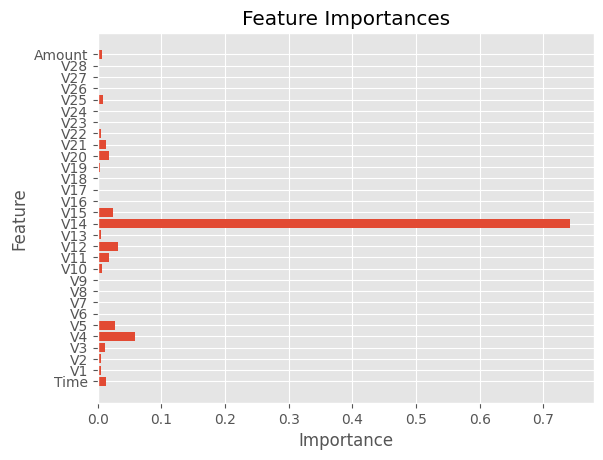

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues') # Confusion matrix heatmap
plt.title('Confusion Matrix') # Title for the plot
plt.xlabel('Predicted') # X-axis label
plt.ylabel('Actual') # Y-axis label
plt.show()  # Show the plot
importances = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances) # Bar plot of feature importances
plt.xlabel('Importance') # X-axis label
plt.ylabel('Feature') # Y-axis label
plt.title('Feature Importances') # Title for the plot
print(classification_report(y_test, y_pred)) # Classification report
print("Feature Importances: ") # Print feature importances

In [24]:
# Filter rows where the Class column is equal to 1
fraud_cases = df[df['Class'] == 1]

# Display the first few rows of fraud cases
print(f"Total Fraud Cases found: {len(fraud_cases)}")
display(fraud_cases.head())

Total Fraud Cases found: 473


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353327,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.759301,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.604864,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117703,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349333,1


In [25]:
# Summary statistics for fraud transactions
print(fraud_cases['Amount'].describe())

# Check the average amount specifically
print("Average Fraud Transaction Amount:", fraud_cases['Amount'].mean())

count    473.000000
mean       0.141371
std        1.039186
min       -0.353327
25%       -0.349333
50%       -0.314109
75%        0.069558
max        8.136603
Name: Amount, dtype: float64
Average Fraud Transaction Amount: 0.14137106674321712


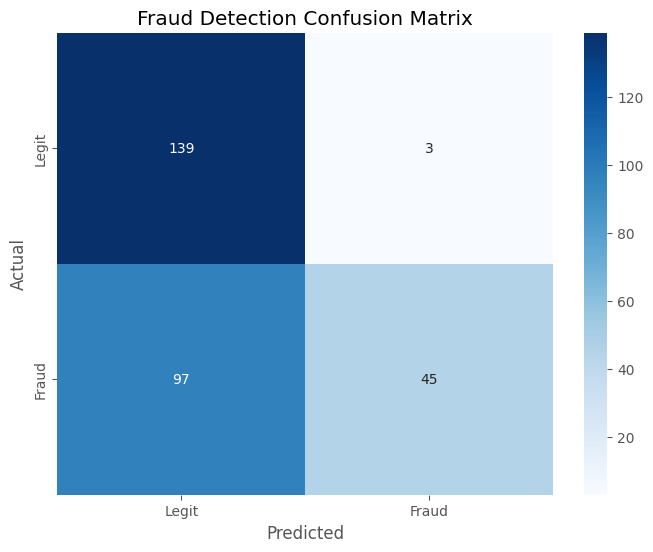

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legit', 'Fraud'], 
            yticklabels=['Legit', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Fraud Detection Confusion Matrix')
plt.show()